<a href="https://colab.research.google.com/github/t-tsue/public/blob/main/PBL02_EDA_image_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
DIR='/content/drive/My Drive/DXQuest_PBL02/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

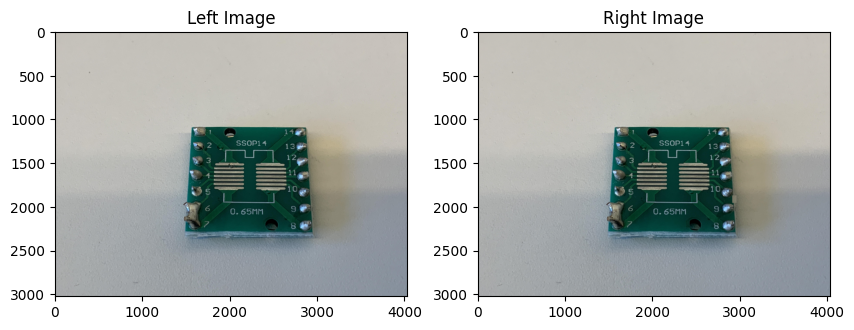

In [3]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
left = Image.open(os.path.join(DIR,'left.jpg'))
right = Image.open(os.path.join(DIR,'right.jpg'))
ax[0].imshow(left)
ax[1].imshow(right)
ax[0].set_title('Left Image')
ax[1].set_title('Right Image')
plt.show(fig)

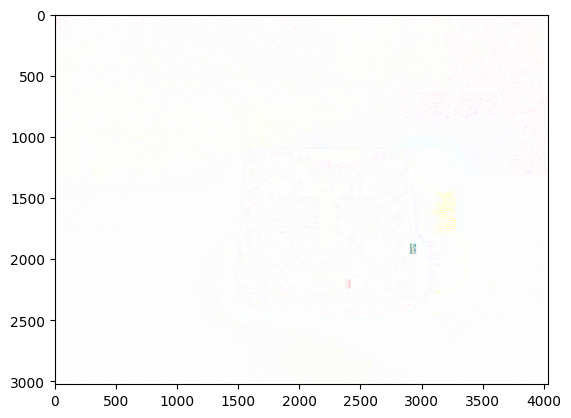

In [4]:
import numpy as np
left = np.array(Image.open(os.path.join(DIR,'left.jpg')))
right = np.array(Image.open(os.path.join(DIR,'right.jpg')))
plt.imshow(255 - left ^ right) # 左右の画像のXOR
plt.show()

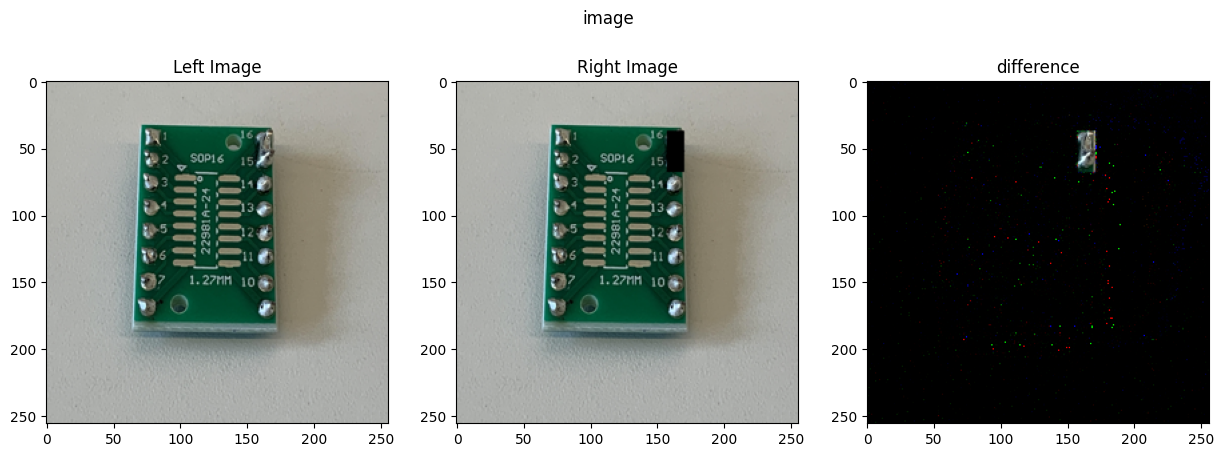

In [17]:
def show_diff(left, right, title='image'):
  fig,ax = plt.subplots(1,3,figsize=(15,5))
  ax[0].imshow(left)
  ax[1].imshow(right)
  ax[2].imshow(left ^ right)
  ax[0].set_title('Left Image')
  ax[1].set_title('Right Image')
  ax[2].set_title('difference')
  fig.suptitle(title)
  plt.show(fig)

bridge_left = np.array(Image.open(os.path.join(DIR,'train/bridge','bridge_000.jpeg')).resize((256,256)))
bridge_right = np.array(Image.open(os.path.join(DIR,'bridge_000_xxx.jpeg')).resize((256,256)))
show_diff(bridge_left, bridge_right)

(65536, 3) (256, 256, 3)
(65536, 3) (256, 256, 3)


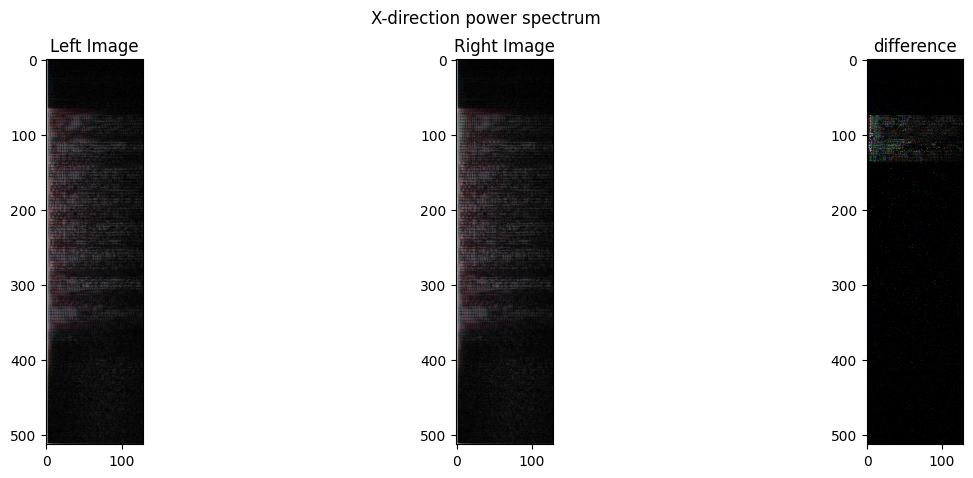

In [18]:
from scipy.signal import stft

def get_array(path):
  with Image.open(path) as img:
    img = img.resize((256,256))
    data = np.array(img.getdata())
    print(data.shape,np.array(img).shape)
    r = data[:,0]
    g = data[:,1]
    b = data[:,2]
    N=img.width
    f_r,t_r,Zxx_r = stft(r,nperseg=N)
    f_g,t_g,Zxx_g = stft(g,nperseg=N)
    f_b,t_b,Zxx_b = stft(b,nperseg=N)
    r_stft = np.log(np.abs(Zxx_r) + 1)
    g_stft = np.log(np.abs(Zxx_g) + 1)
    b_stft = np.log(np.abs(Zxx_b) + 1)
    rgb = np.array([r_stft,g_stft,b_stft])
    max_val = np.max(rgb)
    rgb = ((rgb/max_val)*255).astype(np.uint8).transpose()
  return rgb

im1 = get_array(os.path.join(DIR,'train/bridge','bridge_000.jpeg'))
im2 = get_array(os.path.join(DIR,'bridge_000_xxx.jpeg'))
show_diff(im1,im2, 'X-direction power spectrum')

In [9]:
CROP_MOVE=25
CROP_SIZE=75
def crop_by_entropy(img):
  cropped_arr=[]
  for x in range(0, img.width, CROP_MOVE):
    for y in range(0, img.height, CROP_MOVE):
      cropped = img.crop((x, y, x+CROP_SIZE, y+CROP_SIZE))
      img_ent = cropped.entropy()
      if img_ent < 7.2:
        continue
      if img_ent > 9.5:
        continue
      rgb = np.array(cropped.getdata())
      r = rgb[:,0]
      g = rgb[:,1]
      b = rgb[:,2]
      r_mean = r.mean()
      g_mean = g.mean()
      b_mean = b.mean()
      if abs(r_mean - g_mean) > 20:
        continue
      if abs(g_mean - b_mean) > 20:
        continue
      if abs(b_mean - r_mean) > 20:
        continue
      cropped_arr.append([(x, y, x+CROP_SIZE, y+CROP_SIZE), cropped])
  return cropped_arr

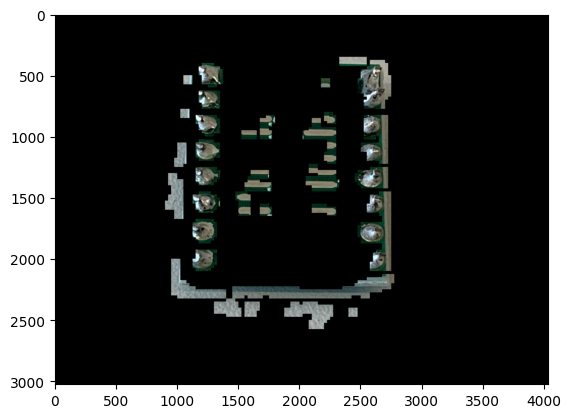

In [11]:
def entropy_test(file):
  with Image.open(file) as img:
    cropped_arr = crop_by_entropy(img)
    img.paste((0,0,0), (0,0,img.width,img.height))
    for point, cropped in cropped_arr:
      img.paste(cropped,point)
  return np.array(img)

plt.imshow(entropy_test(os.path.join(DIR,'train/bridge','bridge_000.jpeg')))
plt.show()